IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.model_selection import train_test_split

READING DATA FROM CSV

In [4]:
UCI=pd.read_csv('UCI.csv')
UCI.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [7]:
UCI.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [6]:
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16']
UCI.drop(columns=columns_to_drop, inplace=True)

DATA PREPROCESSING

 Handling Missing Values:
 

In [8]:
UCI.dropna(how='all',inplace=True)

UCI.dropna(thresh=10,axis=0,inplace=True)

In [9]:
UCI.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

correlation matrix

In [10]:
NUCI=pd.DataFrame()
for column in UCI.columns:
    if UCI[column].dtype != 'object':  
        NUCI[column]=UCI[column]
NUCI.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


<Axes: >

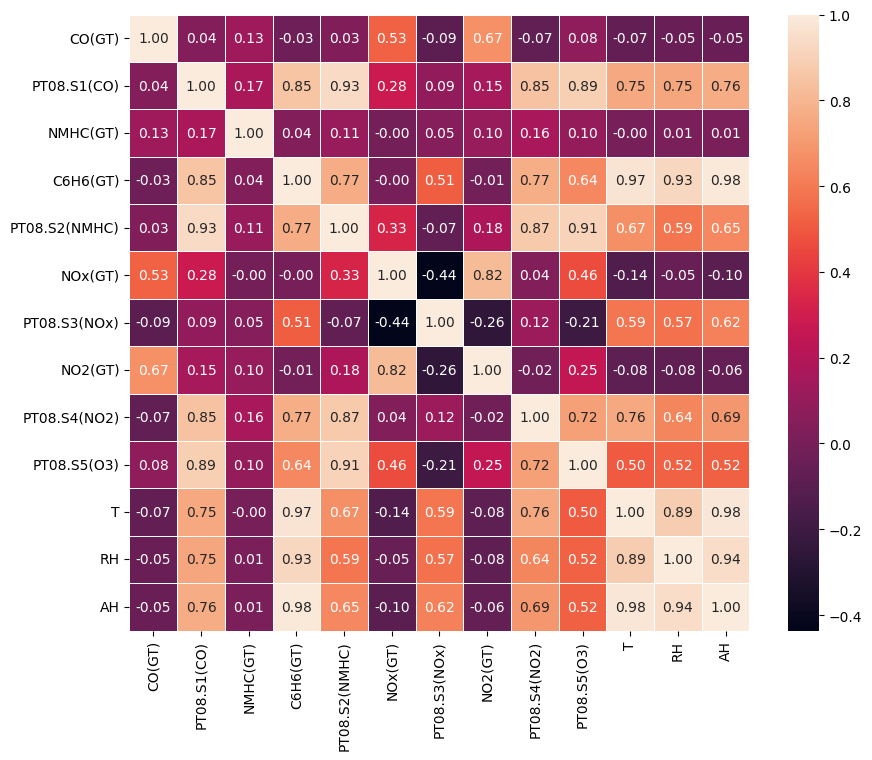

In [14]:
corr_matrix=NUCI.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True,fmt=".2f",linewidth=.5)
#plt.figure(figsize=(15, 25))
#plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
#plt.title('Correlation Matrix')
#plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
#plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
#plt.show()

In [40]:
NUCI.shape

(9357, 13)

OUTLINERS

In [46]:
QUARTILE1 = NUCI["NOx(GT)"].quantile(0.25)
QUARTILE3 = NUCI["NOx(GT)"].quantile(0.75)
IQR = QUARTILE3 - QUARTILE1

lower_bound = QUARTILE1 - 1.5 * IQR

upper_bound = QUARTILE3 + 1.5 * IQR

df3 = NUCI[(NUCI["NOx(GT)"] > lower_bound) & (NUCI["NOx(GT)"] < upper_bound)]
    

deleting unnesscary data

In [47]:
df3.shape

(8847, 13)

In [32]:
columns_to_drop=["PT08.S2(NMHC)","PT08.S4(NO2)","PT08.S5(O3)"]
df3.drop(columns=columns_to_drop, inplace=True)

B) SPLITTING THE DATA 

In [48]:
X1=df3['CO(GT)'].to_numpy().reshape(-1,1)
X2=df3['NMHC(GT)'].to_numpy().reshape(-1,1)
X3=df3['C6H6(GT)'].to_numpy().reshape(-1,1)
X4=df3['NOx(GT)'].to_numpy().reshape(-1,1)
X5=df3['NO2(GT)'].to_numpy().reshape(-1,1)
X6=df3['T'].to_numpy().reshape(-1,1)
ones=np.ones([8847,1]).reshape(-1,1)

Y=df3['RH'].to_numpy().reshape(-1,1)
X=np.hstack([ones,X3,X4,X5,X6])

In [50]:
y_max=np.max(np.abs(Y))
x_max=np.max(np.abs(X))
Y_=(Y-y_max)/y_max
X_=(X-x_max)/x_max


In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.15, random_state=42)
m=y_train.shape[0]

C) 1.LINEAR REGRESSION MODEL 

COST FUNCTION

In [58]:
def cost(y_hat , y_train):
    return np.mean((- y_hat + y_train)**2)

linear function

In [59]:
def hypo(theta,x_train):
    return x_train.dot(theta)

gradient descent

In [61]:
def gd(x_train,y_train,m,theta,learning_rate):
    y_hat=hypo(theta,x_train)
    dm=(1/m)*np.sum(np.multiply((y_train-y_hat),-X_[0]))
    dn=(1/m)*np.sum(np.multiply((y_train-y_hat),-X_[1]))
    do=(1/m)*np.sum(np.multiply((y_train-y_hat),-X_[2]))
    dp=(1/m)*np.sum(np.multiply((y_train-y_hat),-X_[3]))
    dq=(1/m)*np.sum(np.multiply((y_train-y_hat),-X_[4]))
    
    theta[0]=theta[0]-learning_rate*dm
    theta[1]=theta[0]-learning_rate*dm
    theta[2]=theta[0]-learning_rate*dm
    theta[3]=theta[0]-learning_rate*dm
    theta[4]=theta[0]-learning_rate*dm
    
    return theta

In [ ]:
x=np.array([9,8,7])
mx=np.max(x)

implementation

In [67]:
theta=np.empty((5,1))

learning_rate=0.005
echo=10000

l=[]

for i in range(echo):
    theta=gd(x_train,y_train,m,theta,learning_rate)
    y_hat=hypo(theta,x_train).reshape(-1,1)
    l.append(cost(y_hat,y_train))
    

(0.0, 0.1)

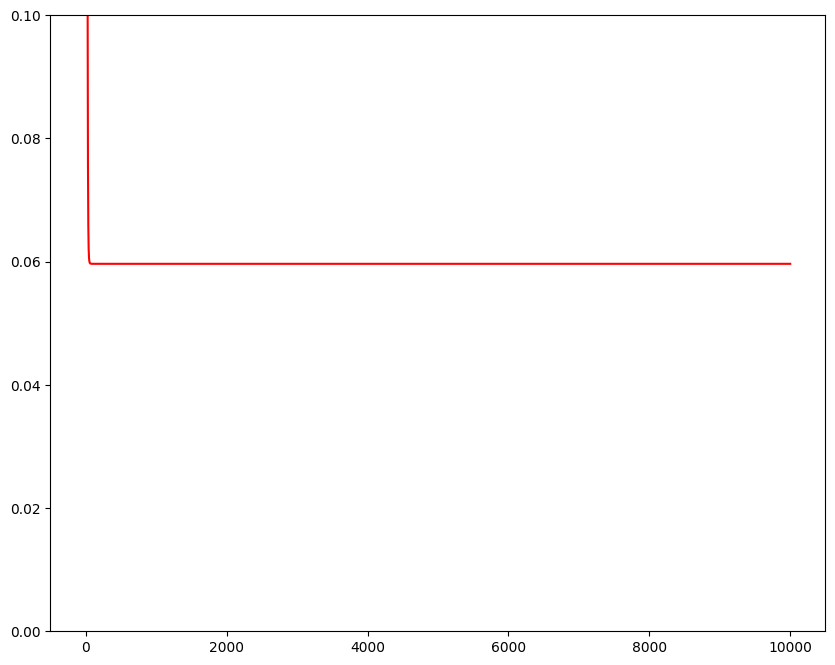

In [65]:
plt.plot(l,'r')
plt.ylim(0,.1)

using sklearn library

In [12]:
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error   

In [14]:
ss=StandardScaler()           

In [25]:

non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in X.columns if col not in non_numeric_columns]

X_numeric = X[numeric_columns]

X_numeric = X_numeric.replace(',', '.', regex=True)

X_numeric = X_numeric.apply(pd.to_numeric, errors='coerce')

X_numeric_std = ss.fit_transform(X_numeric)

X_std = X.copy()
X_std[numeric_columns] = X_numeric_std

In [29]:
y_train

9120    51.9
7658    78.2
8298    43.8
6067    50.0
7962    34.5
        ... 
5734    45.5
5191    57.6
5390    61.4
860     35.7
7270    56.2
Name: RH, Length: 8050, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in x_train.columns if col not in non_numeric_columns]

X_train_numeric = x_train[numeric_columns]
X_test_numeric = x_test[numeric_columns]

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_numeric)

X_test_scaled = ss.transform(X_test_numeric)


lr = LinearRegression()

lr_model = lr.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_test_numeric=y_test

rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred))

r2 = r2_score(y_test_numeric, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



RMSE: 7.73270531319404
R-squared: 0.977253614631697


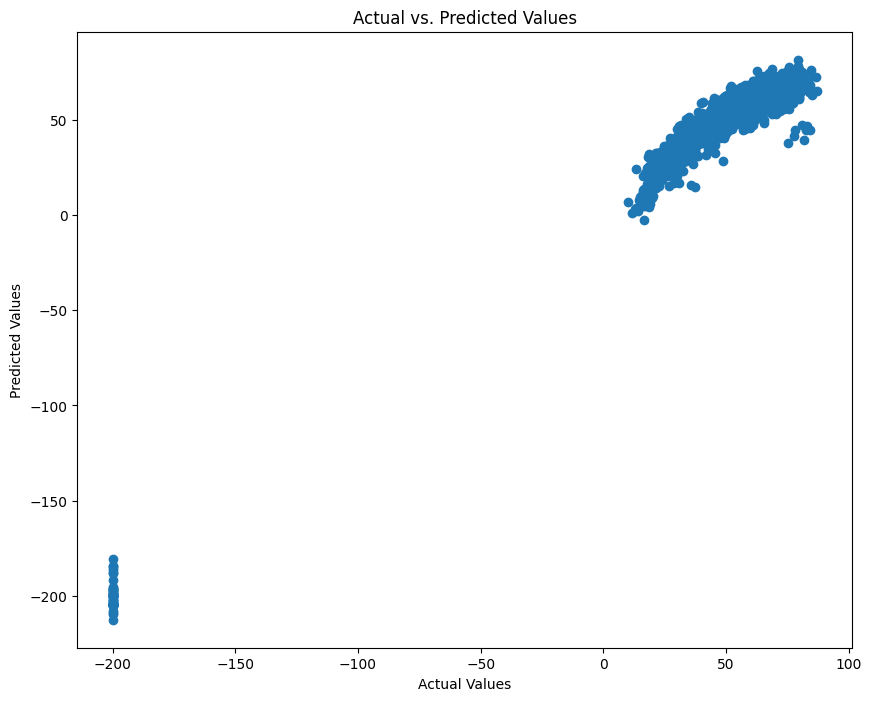

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
